In [66]:
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to


In [67]:
#print(os.listdir('C:\Python'))

In [68]:
train_df = pd.read_csv('train.csv',nrows = 10_000_0)
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [69]:
test_df = pd.read_csv('test.csv')
test_df.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [70]:
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the "Manhattan vector" from
# the pickup location to the dropoff location.
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train_df)

In [95]:
#from datetime import datetime

In [72]:
#train_df["pickup_datetime"][472]

In [73]:
#def add_time_vector_features(df):
#    T=[]
#    for i in range(len(df)):    
#        strs=train_df["pickup_datetime"][i]
#        T.append(datetime.strptime(strs,"%Y-%m-%d %H:%M:%S %Z").time().hour)

#    df['hour'] =T

#add_time_vector_features(test_df)
#add_time_vector_features(train_df)

In [74]:
# Define distance
def dist(pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude):
    pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude = map(np.radians, [pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude])
    dlon = dropoff_longitude - pickup_longitude
    dlat = dropoff_latitude - pickup_latitude
    a = np.sin(dlat/2.0)**2 + np.cos(pickup_latitude) * np.cos(dropoff_latitude) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6367 * c
    return distance

In [75]:
# There are extra charges if trip ends in 3 nearby aiports and 7 nearby counties from the NYC center,
# so these location points and there distances to pickup and dropoff points are key factors 

# Distances to nearby city center, airports, and other ny counties
def transform(data):
    # Distances to nearby airports, city center and other counties
    # By reporting distances to these points, the model can somewhat triangulate other locations of interest
    
    # city center
    nyc = (-74.0060, 40.7128)
    
    
    # county
    data['pickup_distance_to_center'] = dist(nyc[0], nyc[1],
                                      data['pickup_longitude'], data['pickup_latitude'])
    data['dropoff_distance_to_center'] = dist(nyc[0], nyc[1],
                                      data['dropoff_longitude'], data['dropoff_latitude'])
    return data

# Apply to both train and test data      
train_df = transform(train_df)
test_df = transform(test_df)

# Chek shape
print (test_df.shape)
print (train_df.shape)

(9914, 9)
(100000, 12)


In [76]:
train_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_distance_to_center,dropoff_distance_to_center
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,13.651310,13.847002
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,0.862562,8.012836
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,5.731313,4.376458
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,2.763326,5.177725
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,6.915466,8.912964
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2013-09-24 07:39:00.00000071,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5,0.016285,0.007555,9.373497,9.512351
99996,2014-05-15 12:15:45.0000001,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1,0.011260,0.012620,10.253607,8.615557
99997,2015-02-19 17:40:43.0000001,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1,0.004799,0.001175,1.425041,1.775183
99998,2009-10-10 23:35:00.000000165,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4,0.000937,0.010400,5.225330,6.341114


In [9]:
#test_df

In [77]:
print(train_df.isnull().sum())

key                           0
fare_amount                   0
pickup_datetime               0
pickup_longitude              0
pickup_latitude               0
dropoff_longitude             0
dropoff_latitude              0
passenger_count               0
abs_diff_longitude            0
abs_diff_latitude             0
pickup_distance_to_center     0
dropoff_distance_to_center    0
dtype: int64


In [78]:
#Explore and prune outliers
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))

Old size: 100000
New size: 100000


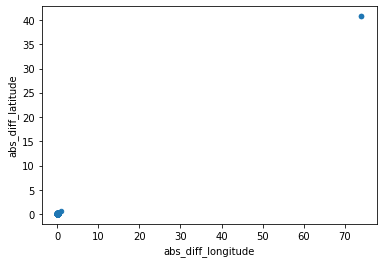

In [79]:
plot = train_df.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

In [80]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.abs_diff_longitude < 5.0) & (train_df.abs_diff_latitude < 5.0)]
print('New size: %d' % len(train_df))

Old size: 100000
New size: 99811


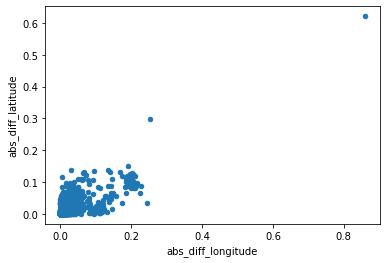

In [81]:
plot1 = train_df.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
print(train_df.columns)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'abs_diff_longitude', 'abs_diff_latitude',
       'pickup_distance_to_center', 'dropoff_distance_to_center'],
      dtype='object')


In [84]:
# Construct and return an Nx3 input matrix for our linear model
# using the travel vector, plus a 1.0 for a constant bias term.
def get_input_matrix(df):
    return np.column_stack((df.abs_diff_longitude, df.abs_diff_latitude, np.ones(len(df))))

def get_input_matrix2(df):
    scaler = StandardScaler()
    scaler.fit(df[['abs_diff_longitude', 'abs_diff_latitude']])
    Trans=scaler.transform(df[['abs_diff_longitude', 'abs_diff_latitude']])
    return np.column_stack((Trans,df[['pickup_distance_to_center','dropoff_distance_to_center']],np.ones(len(df))))


train_X = get_input_matrix2(train_df)#get_input_matrix(train_df)
train_y = np.array(train_df['fare_amount'])

print(train_X.shape)
print(train_y.shape)

(99811, 5)
(99811,)


In [85]:
#linear regression

In [94]:
# The lstsq function returns several things, and we only care about the actual weight vector w.
#(w, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond = None)
#print(w)

In [60]:
# Reuse the above helper functions to add our features and generate the input matrix.
add_travel_vector_features(test_df)
test_X = get_input_matrix2(test_df)


In [21]:
# Predict fare_amount on the test set using our model (w) trained on the training set.
test_y_predictions = np.matmul(test_X, w).round(decimals = 2)

In [93]:
#submission3 = pd.DataFrame(
#    {'key': test_df.key, 'fare_amount': test_y_predictions},
#    columns = ['key', 'fare_amount'])
#submission3.to_csv('submission3.csv', index = False)


In [26]:
#SVR

In [25]:
#from sklearn.svm import SVR
#regrs= SVR(C=1.0, epsilon=0.5)

#regrs.fit(train_X,train_y)

#test_y_predictions=regrs.predict(test_X)

In [27]:
#from sklearn.svm import NuSVR
#regr =NuSVR(C=1.0, nu=0.1)

In [28]:
#regr.fit(train_X,train_y)

NuSVR(nu=0.1)

In [90]:
#test_y_predictions=regr.predict(test_X)

In [89]:
#submission5 = pd.DataFrame(
#    {'key': test_df.key, 'fare_amount': test_y_predictions},
#    columns = ['key', 'fare_amount'])
#submission5.to_csv('submission5.csv', index = False)


In [192]:
#Knn

In [87]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=15)
neigh.fit(train_X,train_y)

test_y_predictions=neigh.predict(test_X)

In [88]:
submission4 = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission4.to_csv('submission4.csv', index = False)
